In [1]:
'''This python script will analyze the stock prices of a company called Carl Zeiss Meditec,
which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: 
https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.'''

'This python script will analyze the stock prices of a company called Carl Zeiss Meditec,\nwhich manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: \nhttps://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.'

In [2]:
# Import the necessary modules
%matplotlib notebook
import requests
import pandas as pd
import datetime
import json
from pandas.io.json import json_normalize
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# This is my key used to pull the data from quandl
API_KEY = 'uyBZ3HHJK42oc-zxRDFp'

In [3]:
# Create the configured URL to use to pull data
window_days = 10
yesterday = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime('%Y-%m-%d')
# We can use a time window to analyze the data
start_date = (datetime.datetime.now() - datetime.timedelta(days=window_days+1)).strftime('%Y-%m-%d')
# but since it doesn't take much time to pull the entire json database we can use the earliest date that is recorded
ealiest_date = '2003-01-20'
WINDOW_URL = f'https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date={start_date}&end_date={yesterday}&api_key={API_KEY}'
ALL_URL = f'https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date={ealiest_date}&end_date={yesterday}&api_key={API_KEY}'

In [4]:
# Get the data from quandl and load it
resp = requests.get(ALL_URL)
json_data = resp.json()
data = json_data["dataset"]["data"]
column_headers = json_data["dataset"]["column_names"]
# Create data frame from the data
df = pd.DataFrame(data)
df.columns = column_headers
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
df = df.set_index('Date')
# Display a snippet of the data to see the general row/column structure
display(df.head())

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2018-10-12,NaN,67.15,64.20,66.80,NaN,242607.0,16049972.0,None,None,NaN
2018-10-11,NaN,63.95,62.35,63.25,NaN,208664.0,13187093.0,None,None,NaN
2018-10-10,NaN,67.30,63.60,63.70,NaN,215727.0,13893065.0,None,None,NaN
2018-10-09,NaN,68.00,66.15,67.00,NaN,148857.0,9966161.0,None,None,NaN
2018-10-08,NaN,69.30,66.75,67.10,NaN,206790.0,13989754.0,None,None,NaN


In [5]:
# Look at the data's structure and clean it if necessary
df.info()
# Clean the data as there are unnecessary rows
df_clean = df.drop(['Change','Last Price of the Day','Daily Traded Units', 'Daily Turnover'],axis='columns')
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4049 entries, 2018-10-12 to 2003-01-20
Data columns (total 10 columns):
Open                     3792 non-null float64
High                     3993 non-null float64
Low                      3993 non-null float64
Close                    4049 non-null float64
Change                   9 non-null float64
Traded Volume            4049 non-null float64
Turnover                 3423 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           626 non-null float64
dtypes: float64(8), object(2)
memory usage: 348.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4049 entries, 2018-10-12 to 2003-01-20
Data columns (total 6 columns):
Open             3792 non-null float64
High             3993 non-null float64
Low              3993 non-null float64
Close            4049 non-null float64
Traded Volume    4049 non-null float64
Turnover         3423 non-null float64
dtype

In [6]:
# Start with an analysis of 2017 data
# Get the 2017 year for the data
df_2017 = df_clean['2017']
df_2017 = df_2017.sort_index()
display(df_2017.head())

,Open,High,Low,Close,Traded Volume,Turnover
Date,,,,,,
2017-01-02,34.99,35.94,34.99,35.80,44700.0,1590561.0
2017-01-03,35.90,35.93,35.34,35.48,70618.0,2515473.0
2017-01-04,35.48,35.51,34.75,35.19,54408.0,1906810.0
2017-01-05,35.02,35.20,34.73,35.06,48412.0,1692326.0
2017-01-06,34.91,35.21,34.91,35.04,27507.0,964046.0


In [7]:
# Calculate the highest and lowest prices were during 2017
high_index = df_2017.High.idxmax(axis=0).strftime('%Y-%m-%d')
high = df_2017.loc[high_index,"High"]
low_index = df_2017.Low.idxmin(axis=0).strftime('%Y-%m-%d')
low = df_2017.loc[low_index,"Low"]
print(f"Highest stock price: ${high} on {high_index}")
print(f"Lowest stock price: ${low} on {low_index}")

Highest stock price: $53.54 on 2017-12-14
Lowest stock price: $33.62 on 2017-01-23


In [8]:
pd.options.mode.chained_assignment = None
# Find the greatest percentage increase (based on High and Low price) that occurred in 2017
df_2017['Change'] = (df_2017.High - df_2017.Low) / df_2017.Low * 100
max_change_index = df_2017['Change'].idxmax(axis=0).strftime('%Y-%m-%d')
max_change = df_2017.loc[max_change_index,"Change"]

# Show surrounding dates
iloc_index = df_2017.index.get_loc(max_change_index)
display(df_2017.iloc[iloc_index-1:iloc_index+2,:])

print(f"Greatest percentage change of stock price ({df_2017.loc[max_change_index,'Low']} to "+\
    f"{df_2017.loc[max_change_index,'High']}) of +{round(max_change,2)}% on {max_change_index}")

,Open,High,Low,Close,Traded Volume,Turnover,Change
Date,,,,,,,
2017-05-10,43.50,43.60,42.53,43.28,91858.0,3958630.0,2.515871
2017-05-11,43.40,46.06,43.25,45.00,189125.0,8496322.0,6.497110
2017-05-12,45.18,45.18,44.16,44.99,159495.0,7113519.0,2.309783


Greatest percentage change of stock price (43.25 to 46.06) of +6.5% on 2017-05-11


In [9]:
# Find the greatest change between any two days (based on Closing Price)
close_diff = df_2017.Close.diff(1).abs()
max_close_diff_index = close_diff.idxmax(axis=0).strftime('%Y-%m-%d')
max_close_diff = close_diff[max_close_diff_index]

# Show surrounding dates
iloc_index = close_diff.index.get_loc(max_close_diff_index)
display(df_2017.iloc[iloc_index-1:iloc_index+2,:])

# From the data we can see that the stock difference is negative
print(f"Greatest closing price difference: -${round(max_close_diff,2)} on {max_close_diff_index}")

,Open,High,Low,Close,Traded Volume,Turnover,Change
Date,,,,,,,
2017-08-08,44.90,45.09,44.15,44.37,156168.0,6941408.0,2.129105
2017-08-09,43.50,43.50,41.64,41.81,355857.0,15003956.0,4.466859
2017-08-10,41.73,41.99,41.14,41.68,175161.0,7303562.0,2.066116


Greatest closing price difference: -$2.56 on 2017-08-09


In [10]:
# Find the average traded volume for the year
avg_trade_volume_2017 = df_2017.loc[:,"Traded Volume"].mean(axis=0)
print(f"Average traded volume in 2017 is {round(avg_trade_volume_2017)} stocks per day")
med_trade_volume_2017 = df_2017.loc[:,"Traded Volume"].median(axis=0)
print(f"Median traded volume in 2017 is {int(med_trade_volume_2017)} stocks per day")

#Display the statistics for the data frame
display(df_2017.describe())

Average traded volume in 2017 is 89124 stocks per day
Median traded volume in 2017 is 76286 stocks per day


,Open,High,Low,Close,Traded Volume,Turnover,Change
count,252.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,43.344206,43.702804,42.924373,43.364157,89124.337255,3.853589e+06,1.813457
std,4.348585,4.365667,4.267225,4.321755,60441.130541,2.517807e+06,0.849523
min,34.000000,34.120000,33.620000,34.060000,45.000000,1.980000e+03,0.446429
25%,41.395000,41.580000,41.045000,41.400000,56282.000000,2.388636e+06,1.241237
50%,43.450000,43.550000,42.620000,43.280000,76286.000000,3.292223e+06,1.628374
75%,45.857500,46.195000,45.390000,45.850000,104479.000000,4.591904e+06,2.196288
max,53.110000,53.540000,52.480000,53.090000,670349.000000,2.591054e+07,6.497110


<IPython.core.display.Javascript object>


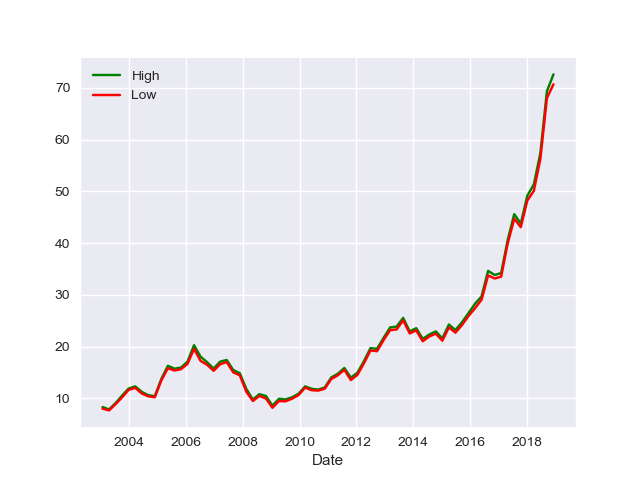

In [11]:
# A plot of the average High stock price over every 12 weeks 
df_price = df_clean.resample('12W')["High","Low"].mean().reset_index()
# Clean the date up
ax = df_price.plot.line(x='Date', y="High",label='High',color='g')
df_price.plot.line(x='Date', y="Low",label='Low',color='r', ax=ax)
plt.show()

<IPython.core.display.Javascript object>


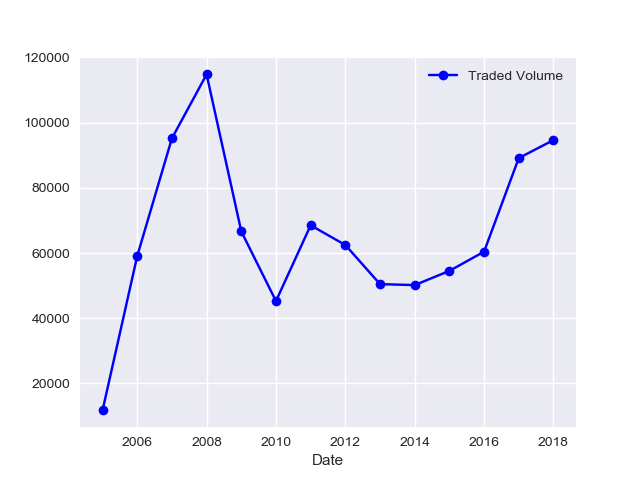

In [14]:
# A plot of the average increase in traded volume over the years
df_tv = df_clean.resample('Y')["Traded Volume"].mean().reset_index()
# Only get the values where the traded volume is greater than zero
df_tv = df_tv[df_tv['Traded Volume'] > 0]
# Clean the date up
df_tv.Date = df_tv.Date.apply(lambda r: int(r.strftime("%Y")))
df_tv.plot.line(x='Date', y="Traded Volume",label='Traded Volume',marker='o',color='b')
plt.show()

<IPython.core.display.Javascript object>


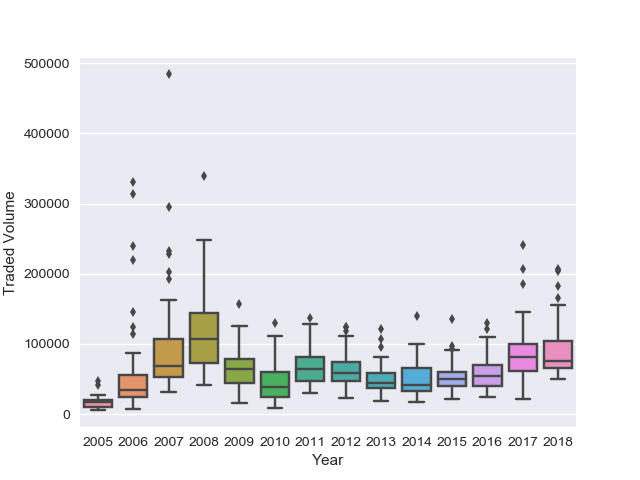

From the plot above, 2006-2008 have some extreme outliers and should reviewed manually


,Date,Traded Volume,Year
197,2006-11-05,330600.6,2006
198,2006-11-12,313589.0,2006
255,2007-12-16,484119.2,2007
256,2007-12-23,295762.8,2007
263,2008-02-10,338810.6,2008


In [15]:
# Since there seems to be an unusual amount of trades happening during 2007, I plotted the data
# resampled to weekly so I can see if there are outliers
df_tv_box = df_clean.resample('W')["Traded Volume"].mean().reset_index()
# Only get the values where the traded volume is greater than zero
df_tv_box = df_tv_box[df_tv_box['Traded Volume'] > 0]
# Clean the date up
df_tv_box['Year'] = df_tv_box.Date.apply(lambda r: int(r.strftime("%Y")))
sns.boxplot(data=df_tv_box,x='Year', y="Traded Volume")
plt.show()
print("From the plot above, 2006-2008 have some extreme outliers and should reviewed manually")
display(df_tv_box[df_tv_box['Traded Volume'] > 275000])